In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Step 3: Load dataset
file_path = '/content/drive/MyDrive/DATASET/winequality-white.csv'
# Membaca dataset dengan delimiter yang benar
df = pd.read_csv(file_path, delimiter=';')

# Menampilkan 5 data awal
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [66]:
# Melihat dimensi dataset
print(f"Dimensi dataset: {df.shape}")

# Informasi tentang dataset
print("\nInformasi dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

# Melihat jumlah data yang kosong
print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())

Dimensi dataset: (4898, 12)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Statistik deskriptif:
       fixed acidity  volatile acidity  citric aci

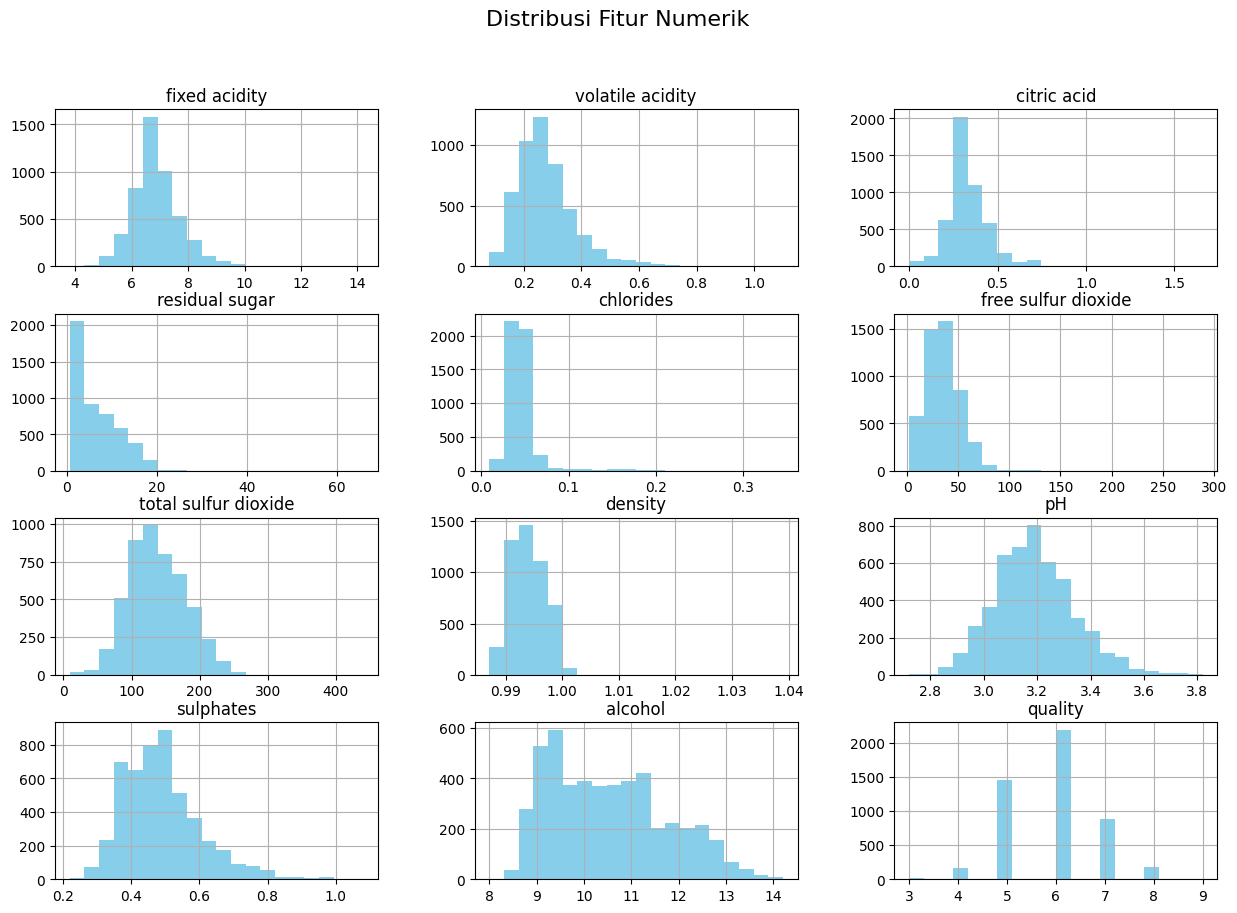

In [67]:
# Histogram untuk semua fitur numerik
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

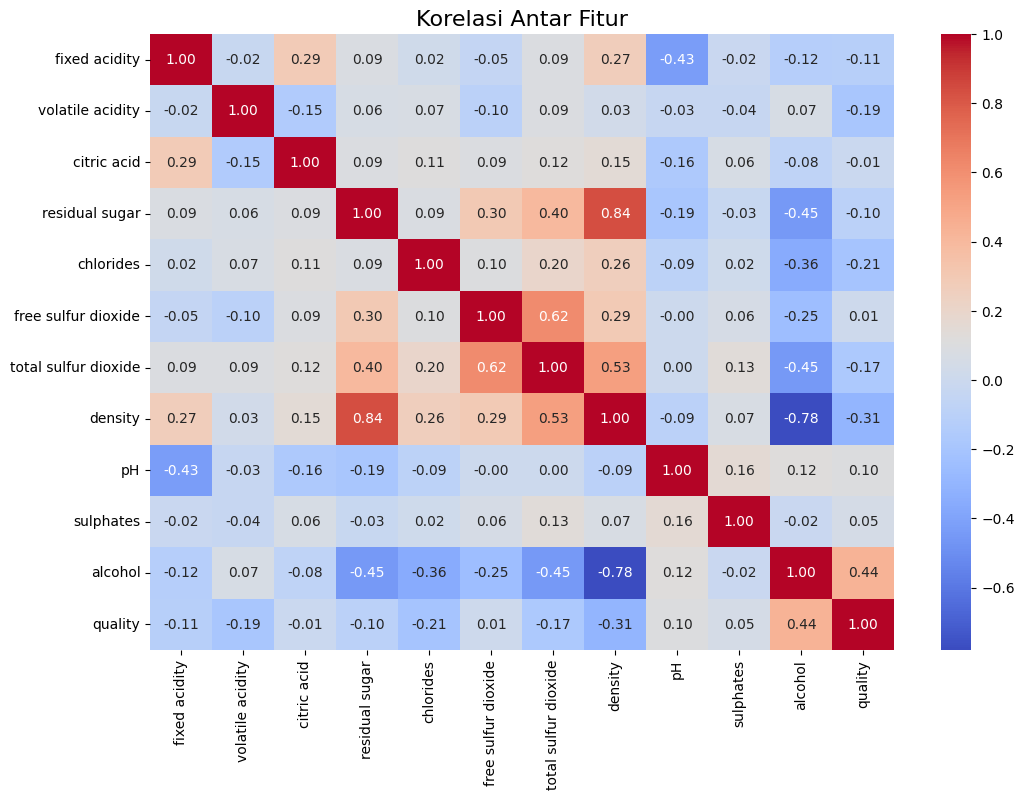

In [68]:
# Matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur', fontsize=16)
plt.show()

<ipython-input-69-2b8250655f34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


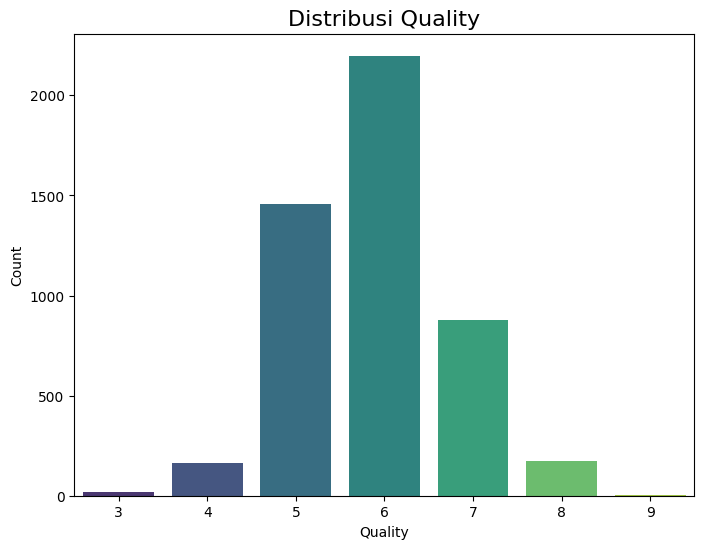

In [69]:
# Distribusi kualitas
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribusi Quality', fontsize=16)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<ipython-input-70-995d0396271a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')


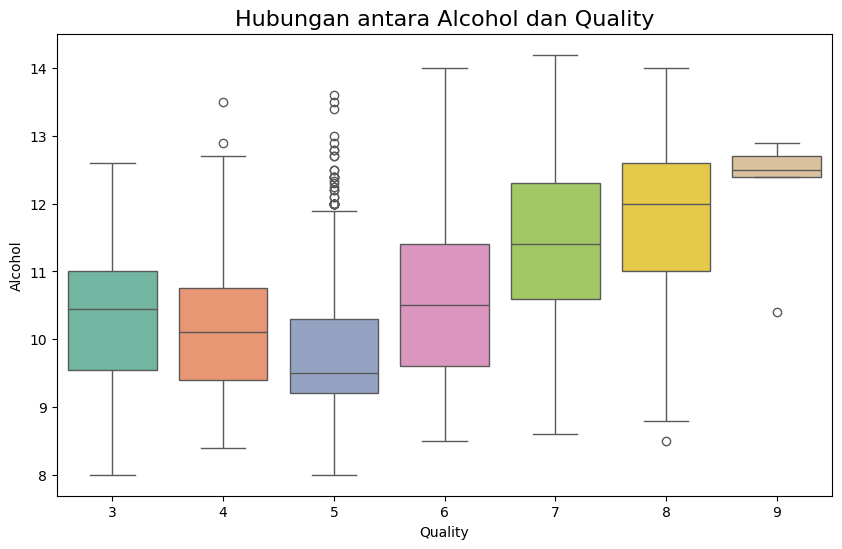

In [70]:
# Boxplot alcohol terhadap quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')
plt.title('Hubungan antara Alcohol dan Quality', fontsize=16)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

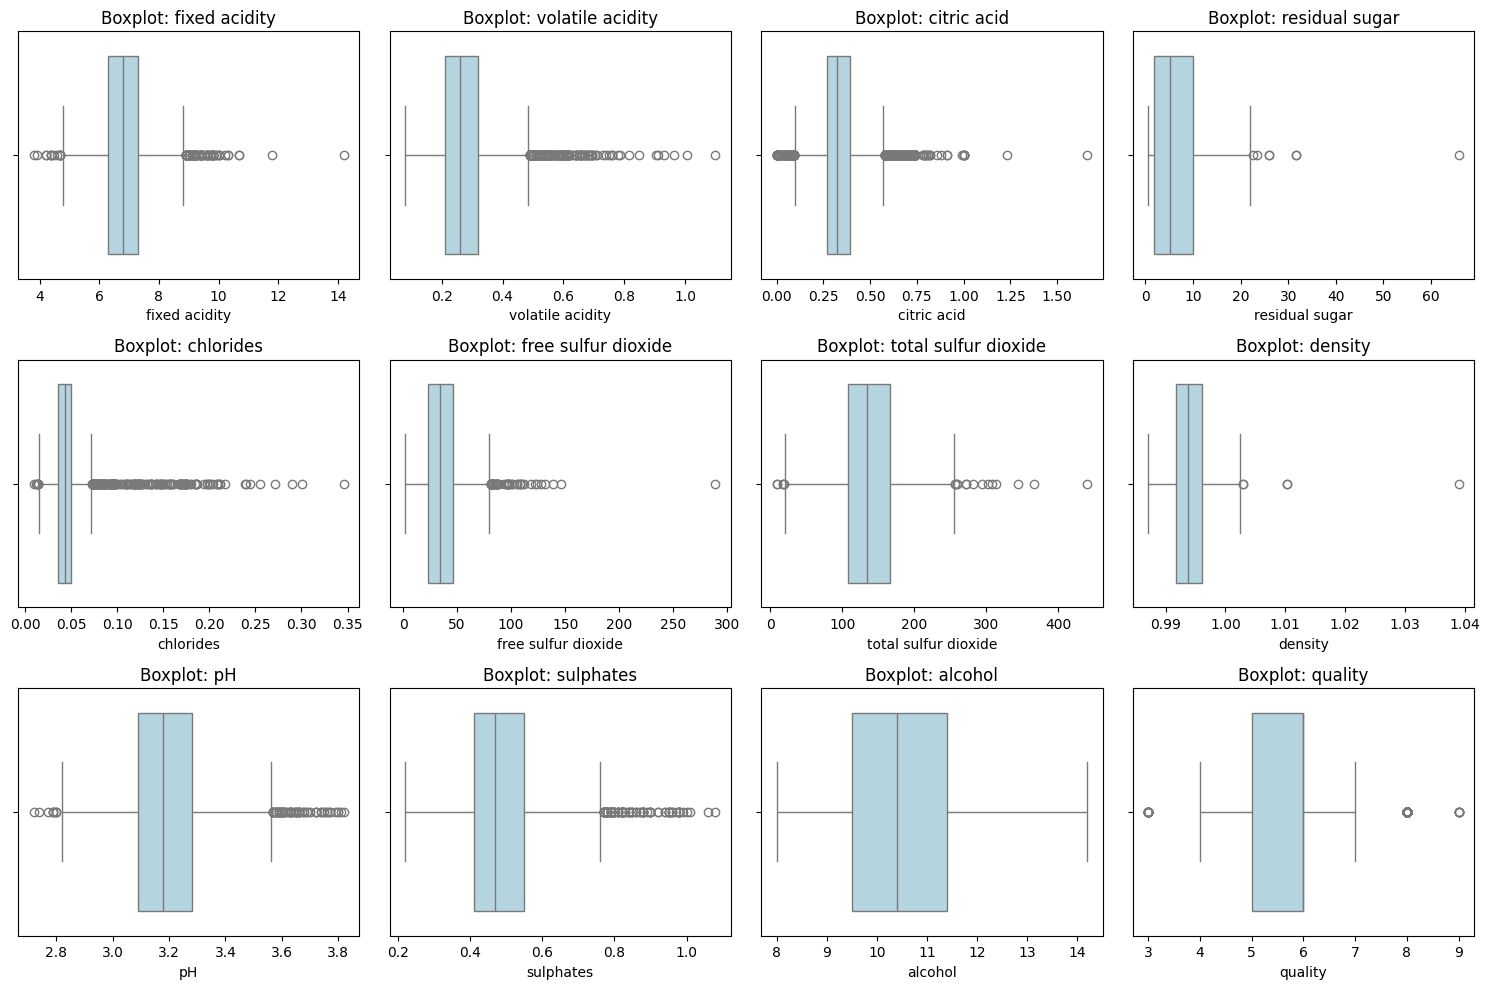

In [71]:
# Boxplot untuk semua fitur numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

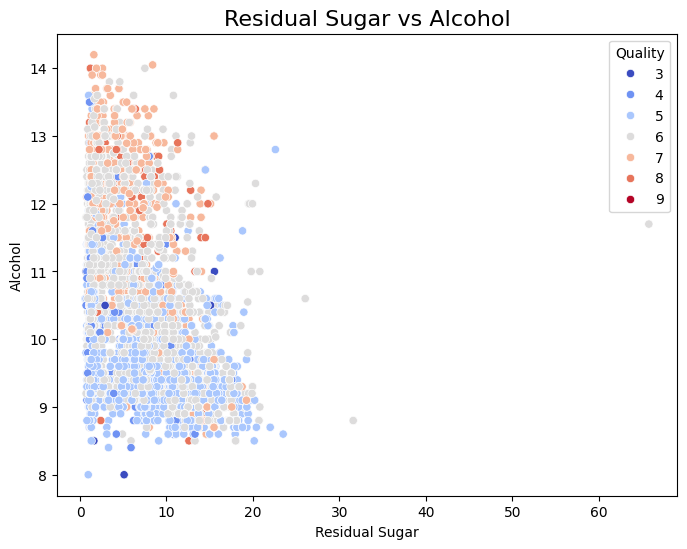

In [72]:
# Scatter plot residual sugar vs alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='residual sugar', y='alcohol', data=df, hue='quality', palette='coolwarm')
plt.title('Residual Sugar vs Alcohol', fontsize=16)
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.legend(title='Quality')
plt.show()

In [73]:
# Fitur dan target
X = df.drop('quality', axis=1)
y = df['quality']

# Binarisasi target (jika diperlukan, untuk binary classification, misalnya memisahkan kualitas rendah vs tinggi)
y = np.where(y >= 6, 1, 0)  # Kualitas >=6 dianggap 1, lainnya 0

# Bagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [74]:
# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Decision Tree Pipeline
pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# k-NN Pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# XGBoost Pipeline
pipeline_xgb = Pipeline([
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [75]:
# Daftar pipeline dan nama model
pipelines = [
    ('Logistic Regression', pipeline_lr),
    ('Decision Tree', pipeline_dt),
    ('k-NN', pipeline_knn),
    ('XGBoost', pipeline_xgb)
]

# Loop untuk melatih dan mengevaluasi setiap model
for name, pipeline in pipelines:
    print(f"Training and evaluating: {name}")
    pipeline.fit(X_train, y_train)  # Training model
    y_pred = pipeline.predict(X_test)  # Prediksi pada testing set

    # Evaluasi model
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training and evaluating: Logistic Regression
Accuracy: 0.7367
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.47      0.54       492
           1       0.76      0.87      0.82       978

    accuracy                           0.74      1470
   macro avg       0.71      0.67      0.68      1470
weighted avg       0.73      0.74      0.72      1470

--------------------------------------------------
Training and evaluating: Decision Tree
Accuracy: 0.7585
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       492
           1       0.82      0.81      0.82       978

    accuracy                           0.76      1470
   macro avg       0.73      0.73      0.73      1470
weighted avg       0.76      0.76      0.76      1470

--------------------------------------------------
Training and evaluating: k-NN
Accuracy: 0.7537
Classification Report:
          

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [76]:
# Simpan hasil evaluasi
results = {}

for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Menampilkan model dengan akurasi terbaik
best_model = max(results, key=results.get)
print(f"Model terbaik adalah: {best_model} dengan akurasi {results[best_model]:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model terbaik adalah: XGBoost dengan akurasi 0.8088


In [77]:
# Logistic Regression
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['liblinear', 'lbfgs']
}

# Decision Tree
param_grid_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 10, 20, 30, 50],
    'dt__min_samples_split': [2, 5, 10]
}

# k-NN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# XGBoost
param_grid_xgb = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__subsample': [0.8, 1.0]
}


In [78]:
# Dictionary untuk menyimpan pipeline dan parameter grid
pipelines = [
    ('Logistic Regression', pipeline_lr, param_grid_lr),
    ('Decision Tree', pipeline_dt, param_grid_dt),
    ('k-NN', pipeline_knn, param_grid_knn),
    ('XGBoost', pipeline_xgb, param_grid_xgb)
]

# Simpan hasil tuning
best_estimators = {}
tuning_results = {}

for name, pipeline, param_grid in pipelines:
    print(f"Tuning hyperparameters for: {name}")
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Training

    # Simpan hasil terbaik
    best_estimators[name] = grid_search.best_estimator_
    tuning_results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print("-" * 50)


Tuning hyperparameters for: Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'lr__C': 1, 'lr__solver': 'lbfgs'}
Best cross-validation score: 0.7614
--------------------------------------------------
Tuning hyperparameters for: Decision Tree
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Decision Tree: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_split': 2}
Best cross-validation score: 0.7625
--------------------------------------------------
Tuning hyperparameters for: k-NN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for k-NN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation score: 0.8124
--------------------------------------------------
Tuning hyperparameters for: XGBoost
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:23:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
Best cross-validation score: 0.8180
--------------------------------------------------


In [79]:
# Evaluasi model dengan parameter terbaik
for name, model in best_estimators.items():
    print(f"Evaluating best model: {name}")
    y_pred = model.predict(X_test)
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Evaluating best model: Logistic Regression
Accuracy on test set: 0.7367
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.47      0.54       492
           1       0.76      0.87      0.82       978

    accuracy                           0.74      1470
   macro avg       0.71      0.67      0.68      1470
weighted avg       0.73      0.74      0.72      1470

--------------------------------------------------
Evaluating best model: Decision Tree
Accuracy on test set: 0.7748
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       492
           1       0.84      0.82      0.83       978

    accuracy                           0.77      1470
   macro avg       0.75      0.75      0.75      1470
weighted avg       0.78      0.77      0.78      1470

--------------------------------------------------
Evaluating best model: k-NN
Accuracy on test set: 0.8150
Cla

In [80]:
# Laporan hasil tuning
print("=== Hyperparameter Tuning Results ===")
for name, result in tuning_results.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print("-" * 50)


=== Hyperparameter Tuning Results ===
Model: Logistic Regression
Best Parameters: {'lr__C': 1, 'lr__solver': 'lbfgs'}
Best Cross-Validation Score: 0.7614
--------------------------------------------------
Model: Decision Tree
Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_split': 2}
Best Cross-Validation Score: 0.7625
--------------------------------------------------
Model: k-NN
Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best Cross-Validation Score: 0.8124
--------------------------------------------------
Model: XGBoost
Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
Best Cross-Validation Score: 0.8180
--------------------------------------------------


Confusion Matrix for Logistic Regression


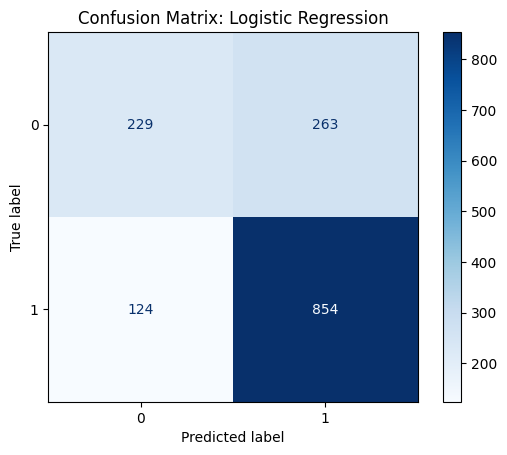

Confusion Matrix for Decision Tree


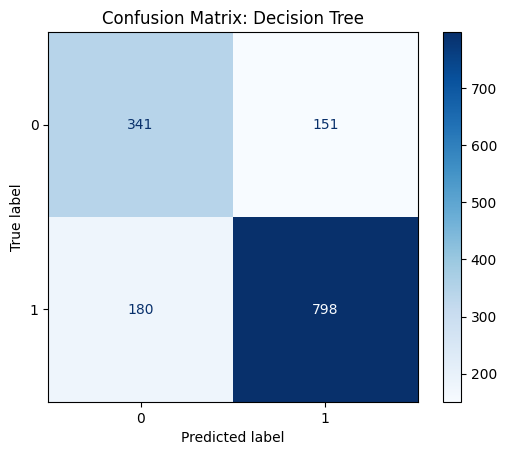

Confusion Matrix for k-NN


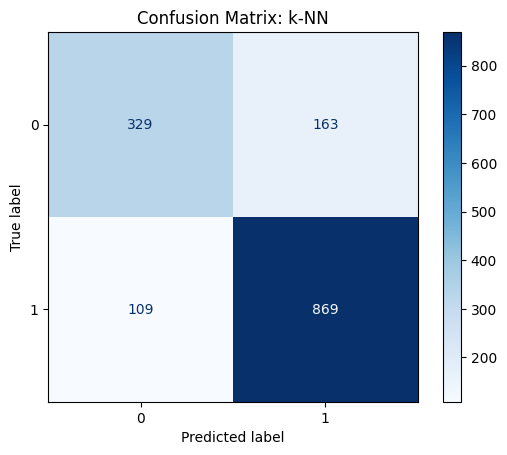

Confusion Matrix for XGBoost


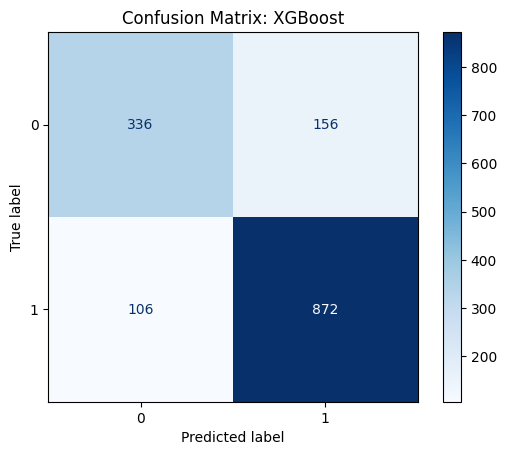

In [81]:
# Visualisasi confusion matrix untuk setiap model
for name, model in best_estimators.items():
    print(f"Confusion Matrix for {name}")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

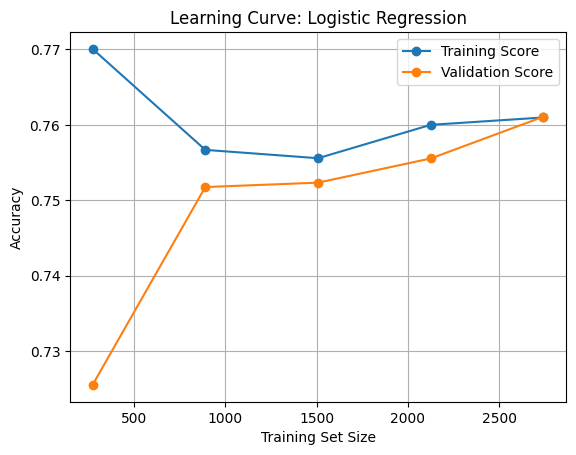

In [82]:
def plot_learning_curve(estimator, title, X, y, cv=None, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation Score')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Contoh untuk Logistic Regression
plot_learning_curve(best_estimators['Logistic Regression'], "Learning Curve: Logistic Regression", X_train, y_train, cv=5)

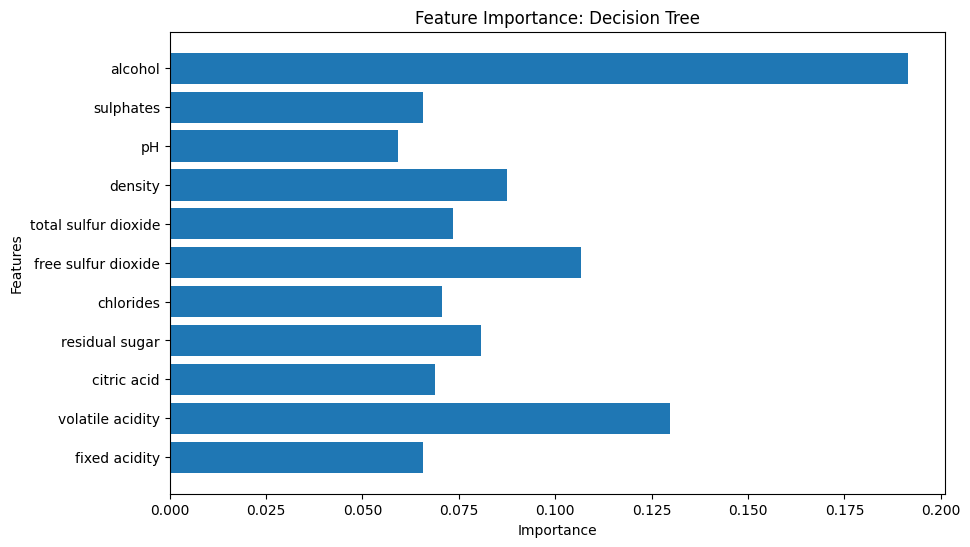

In [83]:
importances = best_estimators['Decision Tree'].named_steps['dt'].feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance: Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

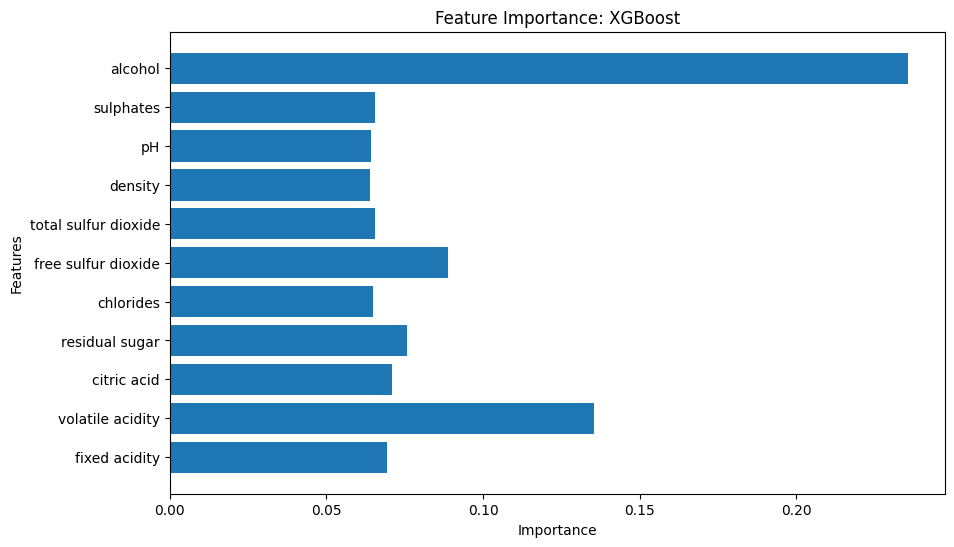

In [84]:
importances = best_estimators['XGBoost'].named_steps['xgb'].feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance: XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

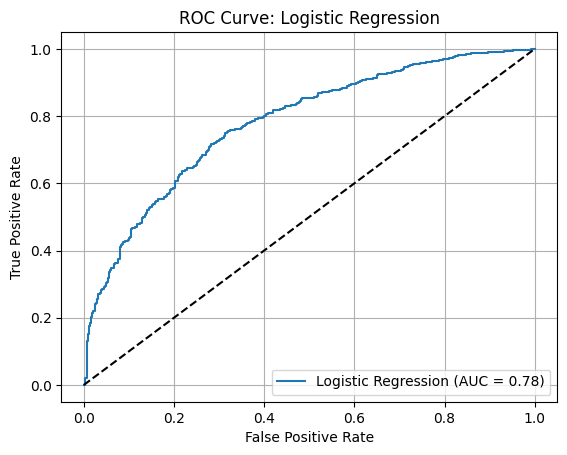

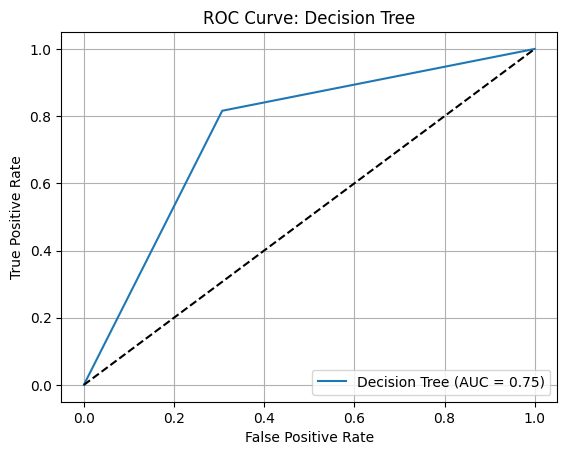

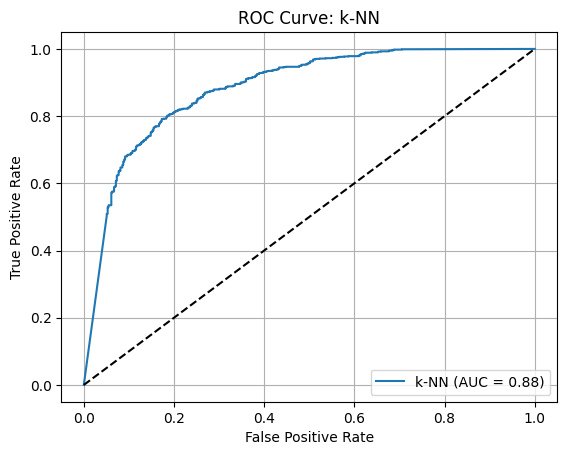

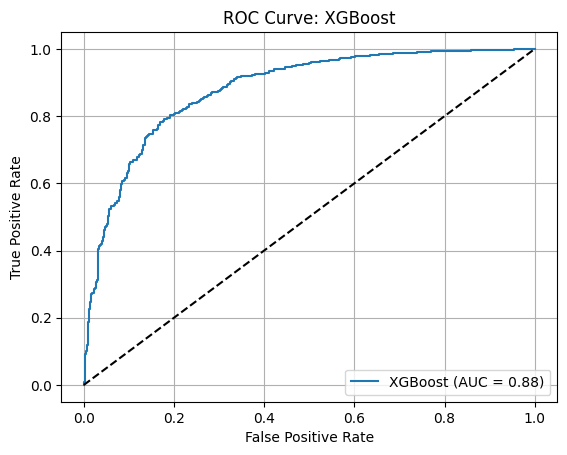

In [85]:
# Plot ROC Curve untuk setiap model
for name, model in best_estimators.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal untuk baseline
    plt.title(f"ROC Curve: {name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

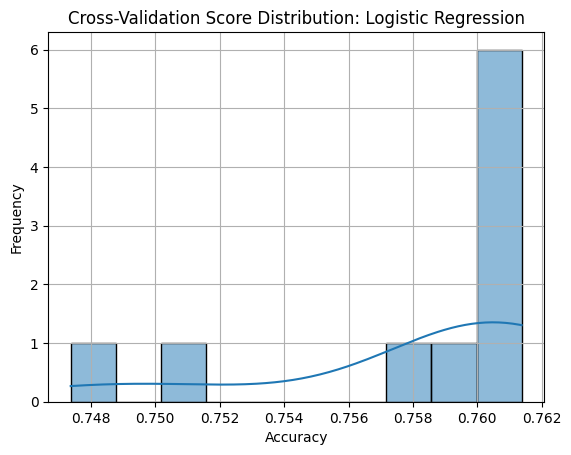

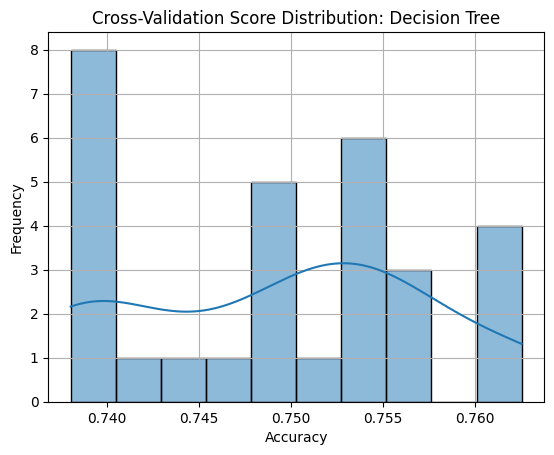

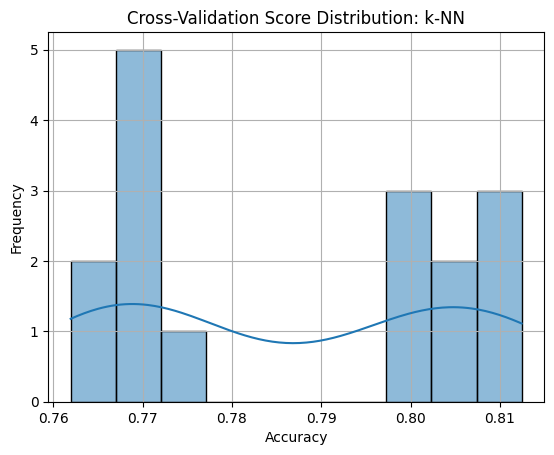

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:26:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


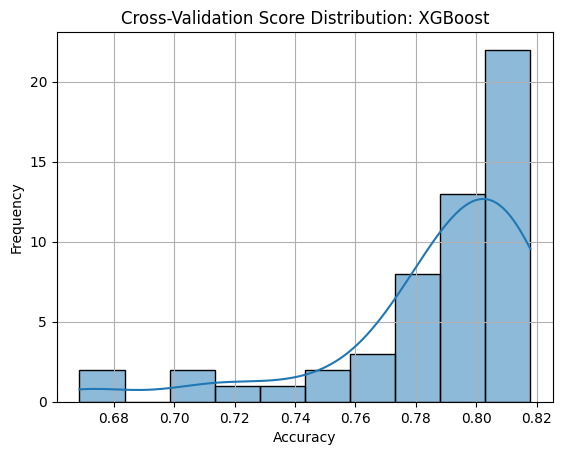

In [87]:
# Visualisasi distribusi cross-validation scores
for name, pipeline, param_grid in pipelines:  # Perhatikan ada 3 elemen di sini
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    cv_results = grid_search.cv_results_['mean_test_score']

    # Visualisasi distribusi menggunakan seaborn
    sns.histplot(cv_results, kde=True, bins=10)
    plt.title(f'Cross-Validation Score Distribution: {name}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [90]:
# Contoh untuk Logistic Regression
y_pred = best_estimators['Logistic Regression'].predict(X_test)
misclassified = X_test[y_test != y_pred]
print("Misclassified Samples:")
print(misclassified)

Misclassified Samples:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3127            7.6              0.30         0.38            2.10      0.043   
2198            7.1              0.26         0.19            8.20      0.051   
2129            6.8              0.28         0.39            1.40      0.036   
4090            6.7              0.24         0.30           10.20      0.070   
3653            6.3              0.32         0.17           17.75      0.060   
...             ...               ...          ...             ...        ...   
2697            7.0              0.18         0.37            1.50      0.043   
4389            6.3              0.28         0.22            9.50      0.040   
412             7.2              0.19         0.39            1.20      0.036   
2192            7.9              0.28         0.41            4.90      0.058   
3599            6.6              0.39         0.38            9.70      0.053   

    